## Decision Tree Machine Learning Model

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

### Data Exploration and Preprocessing

In [17]:
df = pd.read_csv("n240.csv")
df.dropna(inplace=True)
le = LabelEncoder()
df['vegetation_type'] = le.fit_transform(df['vegetation_type'].astype(str))

train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)
train_df.describe()

,region_id,temperature,humidity,wind_speed,rainfall,vegetation_type,drough_index,previous_fire,fire_occurrence
count,11917.000000,11917.000000,11917.000000,11917.000000,11917.000000,11917.000000,11917.000000,11917.000000,11917.000000
mean,25.532600,24.865633,50.008126,19.785267,6.001160,2.236721,0.531983,0.396996,0.394982
std,14.468735,8.936332,22.351929,11.995954,10.176928,1.338836,0.120959,0.489296,0.488867
min,1.000000,-3.318065,-0.730560,-7.498165,0.000000,0.000000,0.003009,0.000000,0.000000
25%,13.000000,18.094335,29.950560,9.652679,0.000000,1.000000,0.486944,0.000000,0.000000
50%,26.000000,24.854847,49.940533,19.622737,1.564763,2.000000,0.558788,0.000000,0.000000
75%,38.000000,31.736961,70.074968,29.929251,7.671714,4.000000,0.608662,1.000000,1.000000
max,50.000000,51.913513,101.474501,48.199633,114.091525,4.000000,0.769467,1.000000,1.000000


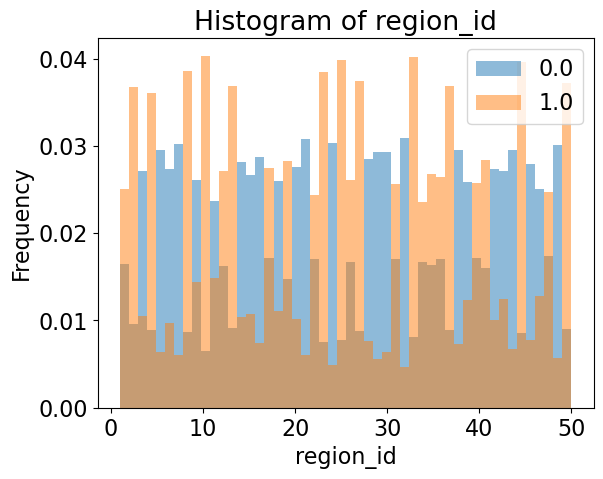

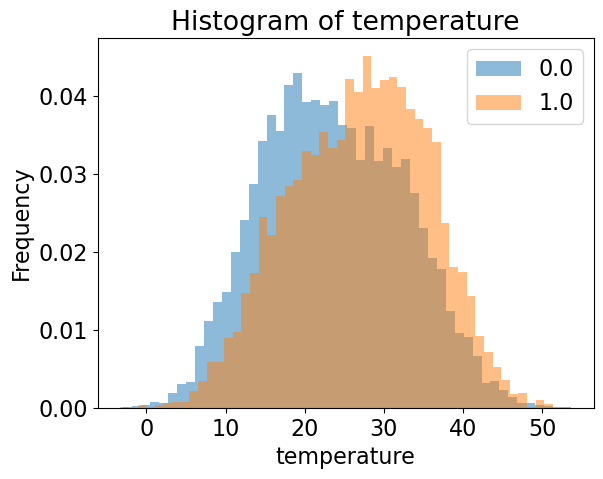

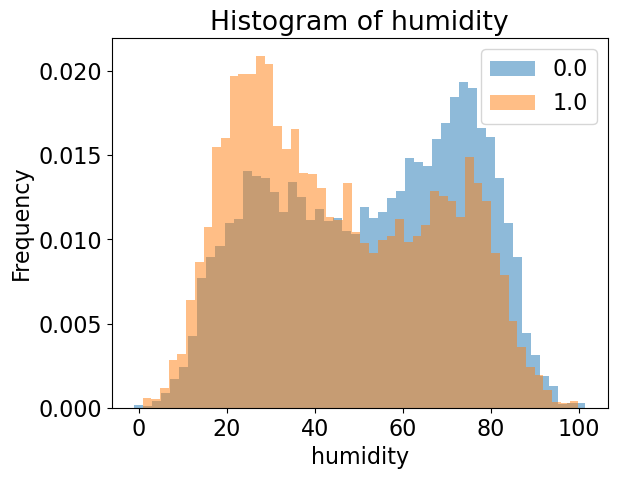

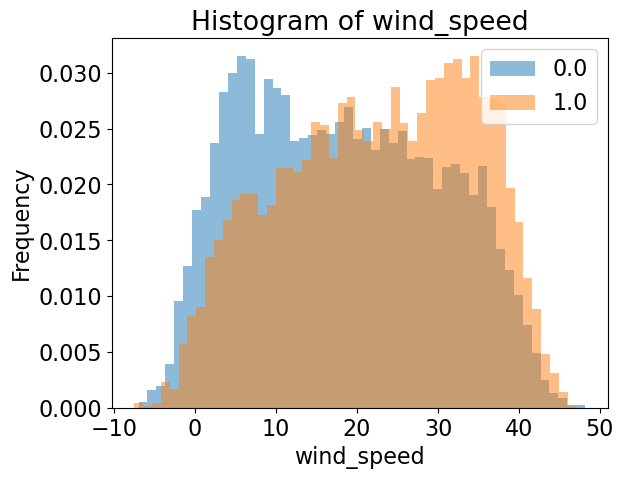

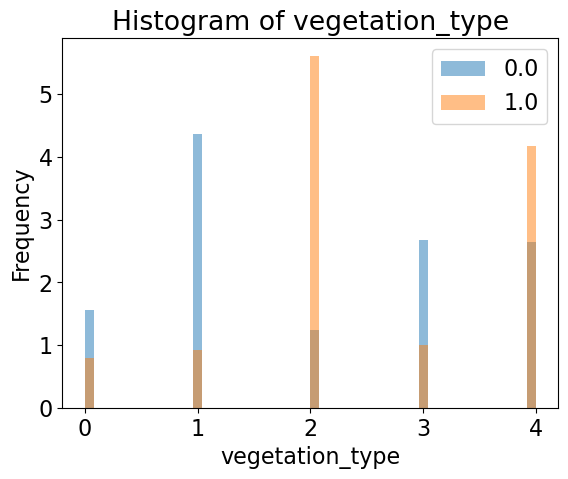

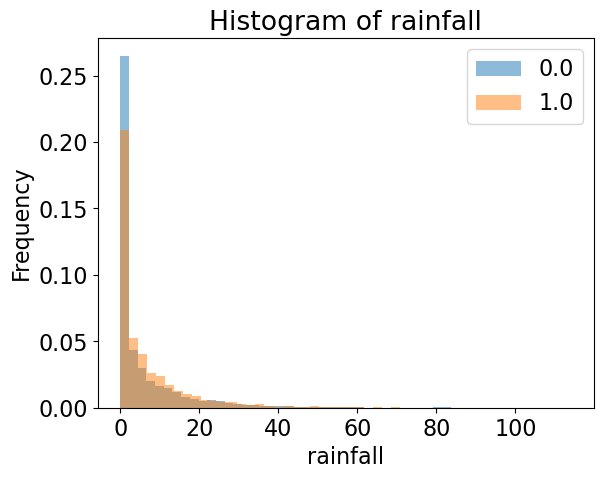

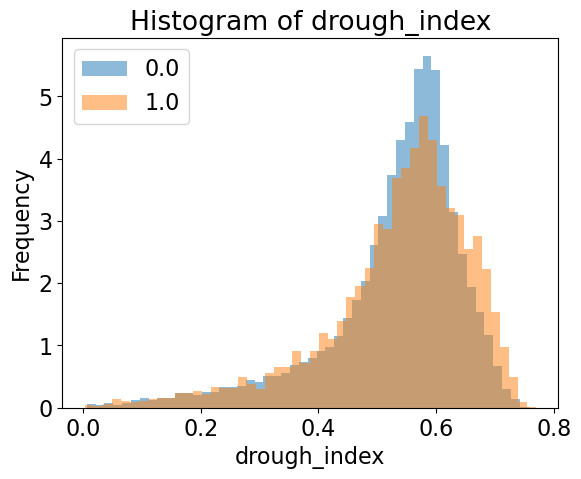

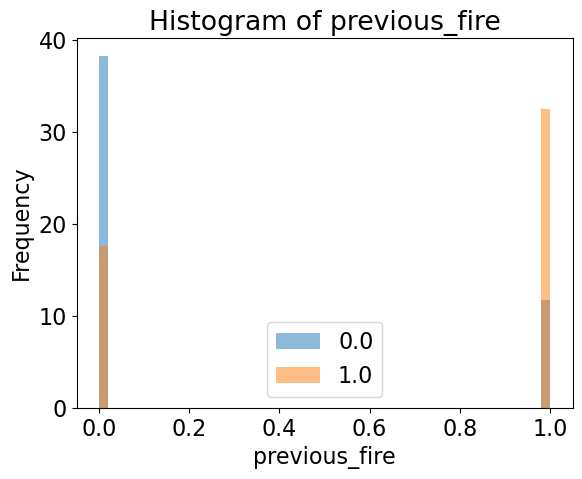

In [19]:
features = ['region_id', 'temperature', 'humidity', 'wind_speed', 'vegetation_type','rainfall', 'drough_index', 'previous_fire']

for feat in features:
    df.groupby("fire_occurrence")[feat].plot.hist(bins=50, alpha=0.5, legend=True, density = True, title = "Histogram of " + feat);
    plt.xlabel(feat)
    plt.show()

### Model Development

In [20]:
X_train = train_df.drop(columns=['fire_occurrence', 'date'])
y_train = train_df['fire_occurrence']
X_test = test_df.drop(columns=['fire_occurrence', 'date'])
y_test = test_df['fire_occurrence']

In [27]:
tree = DecisionTreeClassifier(random_state=123)
tree.fit(X_train, y_train)
max_depth = tree.get_depth()
max_depth

29

In [28]:
depths = np.arange(1, max_depth, 2)
mean_train_accuracy = []
mean_validation_accuracy = []

for i in depths:
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)
    result = cross_validate(tree, X_train, y_train, cv=10, return_train_score=True)
    mean_train_accuracy.append(result['train_score'].mean())
    mean_validation_accuracy.append(result['test_score'].mean())
    

results_df = pd.DataFrame({"train_score": mean_train_accuracy, 
                           "valid_score": mean_validation_accuracy
                           },
                           index=depths)


<Axes: title={'center': 'Pediction Tree Depths vs. Accuracy'}, xlabel='depths', ylabel='accuracy'>

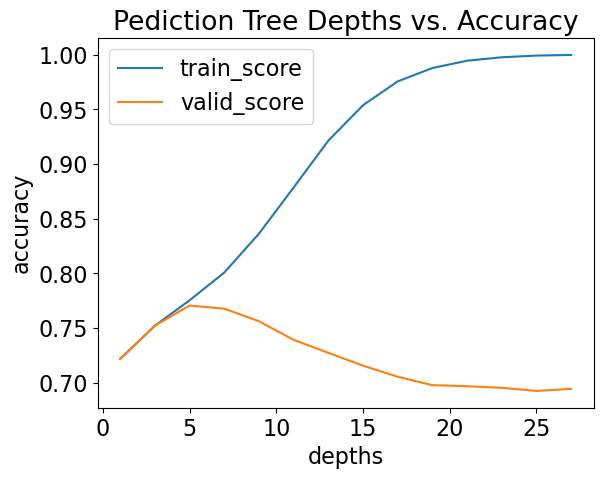

In [30]:
results_df.plot(ylabel="accuracy",xlabel="depths", title="Pediction Tree Depths vs. Accuracy")

In [41]:
best_max_depth = results_df['valid_score'].idxmax()
best_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=123)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(5), random_state=123)

### Model Evaluation

In [40]:
test_score = best_model.score(X_test, y_test)
test_score

0.7563758389261745

In [43]:
importance = pd.DataFrame( 
    data = {
        "features": best_model.feature_names_in_,
        "feature_importances": best_model.feature_importances_
    }
)
importance.sort_values("feature_importances", ascending=False)

,features,feature_importances
7,previous_fire,0.509574
5,vegetation_type,0.337761
3,wind_speed,0.100145
1,temperature,0.044121
2,humidity,0.006403
6,drough_index,0.001996
0,region_id,0.000000
4,rainfall,0.000000
